# <font color = 'darkblue'>**资产组合配置中风险平价模型的应用**

### 风险均衡目标方程

风险均衡理论 (Risk Parity) 最早由钱恩平提出，由此理论产生的等风险贡献投资组合(ERC Portfolio) 使用投资组合收益的波动率作为风险指标，并以组合下每个资产对组合波动率贡献 (Risk Contribution RC) 相同为目标，从而确定投资组合中最佳的配置权重。

投资组合的风险可以写成偏微分的形式

<font color = 'blue'>
\begin{equation}
\sigma_p = \sqrt{W'\Sigma W} = \sum_{i=1}^{N} w_i \frac{\alpha \sigma_p}{\alpha w_i}
\end{equation}
</font>

<font color = 'blue'>
\begin{equation}
RC_i(w) = w_i \frac{\alpha \sigma{p}}{\alpha w_i} = \frac{(\Sigma W)_i w_i}{\sqrt{W'\Sigma W}}
\end{equation}
</font>


可以看出上式满足 $\sum_{i=1}^N RC_i(w) = \sigma_{p}$


<font color = 'blue'>
\begin{equation}
MRC_i(w) = \frac{1}{\sigma p} w_i \frac{\alpha \sigma{p}}{\alpha w_i} = \frac{(\Sigma W)_i w_i}{W'\Sigma W}
\end{equation}
</font>

满足 $\sum_{i=1}^N MRC_i(w) = 1$


已知需要满足风险均衡的条件为： $RC_i = \frac{\sigma_p}{N} $ 或 $MRC_i = \frac{1}{N}$

则在风险均衡要求下，最优投资组合权重可由求解下述方程得到：

<font color = 'blue'>
\begin{equation}
\min \limits_{w} \sum_{i=1}^{N}(MRC_i - \frac{1}{N})^2
\end{equation}
</font>

即为：

<font color = 'blue'>
\begin{equation}
\min \limits_{w} \sum_{i=1}^{N}(\frac{(\sum W)_i w_i}{W'\sum W} - \frac{1}{N})^2
\end{equation}
</font>


In [434]:
import pandas as pd
import numpy as np 
import DE as de  
from scipy.optimize import minimize
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']

### **数据选取与导入**

In [600]:
name_col = ['国泰上证180金融股指数','国泰中证全指证券公司','国泰中证军工','国泰中证生物医药','国泰CES半导体芯片','国泰中证计算机','国泰中证全指通信设备','国泰中证钢铁','国泰中证煤炭','国泰中证全指家电','国泰中证新能源汽车','国泰纳斯达克100','国泰黄金','国泰上证5年期国债','国泰上证10年期国债','国泰瞬利','国泰上证综指','国泰医疗']
ETF_rets = pd.read_csv(U"C:/Users/YUAN PUEN/Desktop/金融工程/JupyterLab/Data/月频ETF收益数据.csv",names = name_col,header = 0,index_col=0,parse_dates=True)
ETF_rets.columns = ETF_rets.columns.str.strip()
ETF_rets = (ETF_rets/100)
ETF_rets

,国泰上证180金融股指数,国泰中证全指证券公司,国泰中证军工,国泰中证生物医药,国泰CES半导体芯片,国泰中证计算机,国泰中证全指通信设备,国泰中证钢铁,国泰中证煤炭,国泰中证全指家电,国泰中证新能源汽车,国泰纳斯达克100,国泰黄金,国泰上证5年期国债,国泰上证10年期国债,国泰瞬利,国泰上证综指,国泰医疗
2012-01-31,0.077860,0.094640,-0.003225,0.000000,-0.067061,-0.049981,-0.056489,0.048227,0.095404,0.014542,0.031284,0.083465,0.107442,0.002764,0.004103,0.000000,0.042372,-0.111371
2012-02-29,0.038449,0.090896,0.116588,0.000000,0.157452,0.130753,0.139005,0.085944,0.080116,0.121319,0.109254,0.062866,0.022024,-0.004089,-0.007025,0.000000,0.059267,0.098732
2012-03-30,-0.058196,-0.020686,-0.086041,0.000000,-0.066747,-0.080151,-0.049676,-0.090309,-0.104270,-0.053301,-0.050969,0.050387,-0.063322,0.006114,0.005205,0.000000,-0.068231,-0.070889
2012-04-27,0.068587,0.131277,0.090307,0.000000,-0.000949,0.039019,0.048368,0.055723,0.103307,0.055441,0.045106,-0.011465,-0.008701,0.002077,-0.000374,0.000000,0.059010,0.022537
2012-05-31,-0.021686,0.081578,-0.018703,0.000000,0.010003,0.011250,0.005715,-0.000572,-0.004269,0.037937,0.050465,-0.072993,-0.042667,0.019214,0.021551,0.000000,-0.010050,0.004785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,0.077548,0.225039,0.284301,0.211749,0.132398,0.079893,0.061334,0.045705,0.128053,0.113825,0.097916,0.073746,0.078464,-0.004664,-0.008910,0.000160,0.109001,0.093339
2020-08-31,0.028890,0.010317,0.057578,-0.092215,-0.070401,-0.009466,-0.004171,0.019258,0.007727,0.050539,-0.018332,0.110474,-0.023242,-0.008181,-0.004932,-0.000090,0.025882,-0.006052
2020-09-30,-0.032612,-0.041399,-0.050905,-0.077574,-0.070581,-0.085709,-0.108274,-0.042696,-0.028022,-0.041425,0.026100,-0.057192,-0.038258,0.002960,-0.000765,0.100143,-0.052309,-0.067564
2020-10-30,0.003757,-0.046943,-0.046434,0.015838,0.012944,-0.006997,-0.037339,0.009601,-0.000559,0.073915,0.132490,-0.031977,-0.014294,0.001313,0.000065,-0.090909,0.002014,0.070877


- 选取了18个国泰基金的ETF时间序列数据，期限由2013年7月16日至2020年12月21日

In [541]:
name1_col = ['国泰上证180金融股指数','国泰中证全指证券公司','国泰中证军工','国泰中证生物医药','国泰CES半导体芯片','国泰中证计算机','国泰中证全指通信设备','国泰中证钢铁','国泰中证煤炭','国泰中证全指家电','国泰中证新能源汽车','国泰纳斯达克100','国泰黄金','国泰上证5年期国债','国泰上证10年期国债','国泰瞬利','国泰上证综指','国泰医疗']
ETF_rets = pd.read_csv(U"C:/Users/YUAN PUEN/Desktop/金融工程/JupyterLab/Data/GT_ETF.csv",names = name1_col,header = 0,index_col=0,parse_dates=True)
ETF_rets.columns = ETF_rets.columns.str.strip()
ETF_rets = (ETF_rets/100)
ETF_rets = pd.concat([ETF_rets.iloc[:,:-3], ETF_rets.iloc[:,-2:]], axis=1)
ETF_rets

,国泰上证180金融股指数,国泰中证全指证券公司,国泰中证军工,国泰中证生物医药,国泰CES半导体芯片,国泰中证计算机,国泰中证全指通信设备,国泰中证钢铁,国泰中证煤炭,国泰中证全指家电,国泰中证新能源汽车,国泰纳斯达克100,国泰黄金,国泰上证5年期国债,国泰上证10年期国债,国泰上证综指,国泰医疗
2013-07-16,-0.001903,0.005199,0.023234,0.010878,0.019222,0.004059,0.012357,0.005044,-0.000299,0.020472,0.017074,-0.003910,-0.002310,-0.000574,0.003019,0.003392,-0.007080
2013-07-17,-0.012393,-0.027064,-0.018980,-0.019355,-0.018002,-0.005317,0.001905,-0.010030,0.000426,-0.012074,-0.037296,-0.003910,0.000386,-0.001742,-0.000156,-0.009141,-0.018770
2013-07-18,-0.025097,-0.021458,0.011035,-0.006738,0.015354,0.028568,0.020403,-0.014228,-0.025105,-0.006552,-0.002172,0.000981,-0.010725,-0.000121,0.001074,-0.013052,0.008489
2013-07-19,-0.022442,-0.033580,-0.029250,-0.010049,-0.026828,-0.004914,-0.028120,-0.023545,-0.029514,-0.017747,-0.031629,-0.000980,0.011583,0.000293,0.005216,-0.013441,-0.015891
2013-07-22,0.003038,0.019124,0.020084,0.036091,0.034531,0.038781,0.029142,0.005779,0.005986,0.015411,0.015343,-0.003925,0.020047,-0.000686,0.001451,-0.000084,0.038322
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-15,-0.005978,0.002573,0.003607,0.023143,-0.009159,0.007897,-0.007149,0.001657,-0.003303,0.003782,0.008753,0.001903,0.008106,0.001684,0.000274,-0.010091,0.010413
2020-12-16,0.000859,-0.011121,-0.008086,-0.002104,-0.015126,-0.012108,-0.022620,-0.005790,-0.009114,0.002261,-0.001085,0.016382,0.006701,0.000547,0.000046,0.002049,0.004988
2020-12-17,0.012876,0.026817,-0.008152,0.016869,0.006826,0.002163,0.005786,0.026622,0.033445,0.024060,0.017915,0.000467,0.005325,-0.000397,-0.000830,0.012270,0.014888
2020-12-18,-0.015254,-0.011794,0.000600,-0.006221,-0.008475,-0.008633,-0.009588,0.018639,0.059871,-0.008076,0.026133,0.004670,0.007415,-0.000580,0.000009,-0.006061,-0.011531


In [453]:
def compound(r):
    """
    returns the result of compounding the set of returns in r
    """
    return np.expm1(np.log1p(r).sum())

In [542]:
ETF_rets_m = ETF_rets.resample('M').apply(compound).to_period('M')
ETF_rets_m

,国泰上证180金融股指数,国泰中证全指证券公司,国泰中证军工,国泰中证生物医药,国泰CES半导体芯片,国泰中证计算机,国泰中证全指通信设备,国泰中证钢铁,国泰中证煤炭,国泰中证全指家电,国泰中证新能源汽车,国泰纳斯达克100,国泰黄金,国泰上证5年期国债,国泰上证10年期国债,国泰上证综指,国泰医疗
2013-07,-0.065651,-0.040695,-0.025976,-0.007539,0.010013,0.035313,0.026210,-0.036911,-0.047991,0.002455,-0.056917,-0.012676,0.026250,-0.000050,0.011066,-0.043163,-0.045137
2013-08,0.064494,0.045426,0.060362,0.020627,0.088010,0.080832,0.044309,0.067707,0.094830,0.035000,0.049497,0.003878,0.050057,-0.012527,-0.015665,0.048657,0.018728
2013-09,0.047513,0.027220,0.053306,0.096435,0.099925,0.111674,0.060132,0.009264,0.008129,0.030654,0.047255,0.065684,-0.050180,0.000010,-0.021689,0.038737,0.198431
2013-10,-0.024886,-0.032599,-0.030645,-0.087179,-0.037335,-0.067175,-0.094317,-0.021285,-0.053110,0.075226,-0.055125,0.056816,-0.012831,-0.004086,-0.001816,-0.007412,-0.067561
2013-11,0.014170,0.052704,0.245135,0.055874,0.172589,0.104192,0.136056,0.044647,0.045093,0.071131,0.050909,0.026056,-0.064219,-0.011459,-0.011336,0.026683,0.129118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08,0.016606,0.016868,0.063020,-0.090946,-0.069193,-0.001937,0.000793,0.043480,0.026485,0.043551,-0.007331,0.290305,-0.021547,-0.010414,-0.005771,0.023225,-0.006053
2020-09,-0.036300,-0.045812,-0.049695,-0.077917,-0.025962,-0.078862,-0.103805,-0.028911,-0.021351,-0.043340,0.031756,-0.099447,-0.037191,0.001760,0.004232,-0.065514,-0.067564
2020-10,0.004484,-0.048843,-0.048624,0.012999,0.011743,-0.006317,-0.035368,0.011382,0.000910,0.075505,0.128131,-0.066739,-0.019567,0.002162,-0.000763,0.003165,0.070877
2020-11,0.077679,0.063534,0.087752,-0.096247,0.078723,-0.015539,0.019248,0.090909,0.176196,0.032806,0.083754,0.015526,-0.069206,-0.001447,-0.003833,0.034682,-0.103262


In [547]:
ETF_rets_m.to_csv('月度数据收益率.csv')

<font color = 'red'>ETF收益的协方差矩阵：

In [593]:
covmatrix = ETF_rets.cov()
annu_cov = covmatrix*12
annu_cov.head()

,国泰上证180金融股指数,国泰中证全指证券公司,国泰中证军工,国泰中证生物医药,国泰CES半导体芯片,国泰中证计算机,国泰中证全指通信设备,国泰中证钢铁,国泰中证煤炭,国泰中证全指家电,国泰中证新能源汽车,国泰纳斯达克100,国泰黄金,国泰上证5年期国债,国泰上证10年期国债,国泰瞬利,国泰上证综指,国泰医疗
国泰上证180金融股指数,0.072097,0.101654,0.040993,0.021503,0.024738,0.034231,0.032504,0.051627,0.054075,0.036710,0.033662,0.011910,0.000245,-0.000487,-0.001139,-0.000246,0.050646,0.023932
国泰中证全指证券公司,0.101654,0.174617,0.078617,0.049365,0.063496,0.074985,0.068170,0.076366,0.079424,0.059327,0.064750,0.016188,0.001339,0.000140,-0.000395,0.000265,0.077687,0.050949
国泰中证军工,0.040993,0.078617,0.114329,0.071581,0.107531,0.102121,0.092353,0.053857,0.054864,0.057514,0.082331,0.015562,-0.000076,0.000160,-0.000127,-0.000084,0.053726,0.081593
国泰中证生物医药,0.021503,0.049365,0.071581,0.084736,0.086540,0.088916,0.073168,0.030205,0.027841,0.048303,0.065845,0.010681,0.000988,0.000047,0.000106,-0.000799,0.037573,0.083720
国泰CES半导体芯片,0.024738,0.063496,0.107531,0.086540,0.162175,0.127053,0.110636,0.041586,0.038898,0.060505,0.102460,0.013242,-0.001018,0.000881,0.001007,-0.000648,0.045340,0.099504


In [601]:
corr_max = ETF_rets.corr()
corr_max.head()

,国泰上证180金融股指数,国泰中证全指证券公司,国泰中证军工,国泰中证生物医药,国泰CES半导体芯片,国泰中证计算机,国泰中证全指通信设备,国泰中证钢铁,国泰中证煤炭,国泰中证全指家电,国泰中证新能源汽车,国泰纳斯达克100,国泰黄金,国泰上证5年期国债,国泰上证10年期国债,国泰瞬利,国泰上证综指,国泰医疗
国泰上证180金融股指数,1.000000,0.905989,0.451519,0.275103,0.228775,0.348208,0.374284,0.745146,0.719500,0.547208,0.386345,0.281487,0.006288,-0.070853,-0.129841,-0.018858,0.868673,0.274095
国泰中证全指证券公司,0.905989,1.000000,0.556409,0.405830,0.377321,0.490127,0.504398,0.708242,0.679052,0.568246,0.477513,0.245845,0.022041,0.013082,-0.028923,0.013066,0.856202,0.374948
国泰中证军工,0.451519,0.556409,1.000000,0.727253,0.789705,0.824920,0.844492,0.617292,0.579704,0.680806,0.750369,0.292073,-0.001544,0.018454,-0.011473,-0.005127,0.731773,0.742085
国泰中证生物医药,0.275103,0.405830,0.727253,1.000000,0.738224,0.834293,0.777151,0.402130,0.341695,0.664149,0.697074,0.232850,0.023335,0.006302,0.011105,-0.056542,0.594447,0.884439
国泰CES半导体芯片,0.228775,0.377321,0.789705,0.738224,1.000000,0.861723,0.849424,0.400201,0.345088,0.601342,0.784064,0.208682,-0.017389,0.085498,0.076502,-0.033165,0.518512,0.759841


In [602]:
#组合2
ETF_rets2 = pd.read_csv(U"C:/Users/YUAN PUEN/Desktop/金融工程/JupyterLab/Data/月频ETF收益数据.csv",names = name_col,header = 0,index_col=0,parse_dates=True)
ETF_rets2.columns = ETF_rets2.columns.str.strip()
ETF_rets2 = (ETF_rets2/100)
ETF_rets2 = pd.concat([ETF_rets2.iloc[:,:-6],ETF_rets2.iloc[:,-2:] ], axis=1)
ETF_rets2

,国泰上证180金融股指数,国泰中证全指证券公司,国泰中证军工,国泰中证生物医药,国泰CES半导体芯片,国泰中证计算机,国泰中证全指通信设备,国泰中证钢铁,国泰中证煤炭,国泰中证全指家电,国泰中证新能源汽车,国泰纳斯达克100,国泰上证综指,国泰医疗
2012-01-31,0.077860,0.094640,-0.003225,0.000000,-0.067061,-0.049981,-0.056489,0.048227,0.095404,0.014542,0.031284,0.083465,0.042372,-0.111371
2012-02-29,0.038449,0.090896,0.116588,0.000000,0.157452,0.130753,0.139005,0.085944,0.080116,0.121319,0.109254,0.062866,0.059267,0.098732
2012-03-30,-0.058196,-0.020686,-0.086041,0.000000,-0.066747,-0.080151,-0.049676,-0.090309,-0.104270,-0.053301,-0.050969,0.050387,-0.068231,-0.070889
2012-04-27,0.068587,0.131277,0.090307,0.000000,-0.000949,0.039019,0.048368,0.055723,0.103307,0.055441,0.045106,-0.011465,0.059010,0.022537
2012-05-31,-0.021686,0.081578,-0.018703,0.000000,0.010003,0.011250,0.005715,-0.000572,-0.004269,0.037937,0.050465,-0.072993,-0.010050,0.004785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,0.077548,0.225039,0.284301,0.211749,0.132398,0.079893,0.061334,0.045705,0.128053,0.113825,0.097916,0.073746,0.109001,0.093339
2020-08-31,0.028890,0.010317,0.057578,-0.092215,-0.070401,-0.009466,-0.004171,0.019258,0.007727,0.050539,-0.018332,0.110474,0.025882,-0.006052
2020-09-30,-0.032612,-0.041399,-0.050905,-0.077574,-0.070581,-0.085709,-0.108274,-0.042696,-0.028022,-0.041425,0.026100,-0.057192,-0.052309,-0.067564
2020-10-30,0.003757,-0.046943,-0.046434,0.015838,0.012944,-0.006997,-0.037339,0.009601,-0.000559,0.073915,0.132490,-0.031977,0.002014,0.070877


In [457]:
ETF_rets2_m = ETF_rets2.resample('M').apply(compound).to_period('M')
ETF_rets2_m.head()

,国泰上证180金融股指数,国泰中证全指证券公司,国泰中证军工,国泰中证生物医药,国泰CES半导体芯片,国泰中证计算机,国泰中证全指通信设备,国泰中证钢铁,国泰中证煤炭,国泰中证全指家电,国泰中证新能源汽车,国泰纳斯达克100,国泰上证综指,国泰医疗
2013-07,-0.065651,-0.040695,-0.025976,-0.007539,0.010013,0.035313,0.026210,-0.036911,-0.047991,0.002455,-0.056917,-0.012676,-0.043163,-0.045137
2013-08,0.064494,0.045426,0.060362,0.020627,0.088010,0.080832,0.044309,0.067707,0.094830,0.035000,0.049497,0.003878,0.048657,0.018728
2013-09,0.047513,0.027220,0.053306,0.096435,0.099925,0.111674,0.060132,0.009264,0.008129,0.030654,0.047255,0.065684,0.038737,0.198431
2013-10,-0.024886,-0.032599,-0.030645,-0.087179,-0.037335,-0.067175,-0.094317,-0.021285,-0.053110,0.075226,-0.055125,0.056816,-0.007412,-0.067561
2013-11,0.014170,0.052704,0.245135,0.055874,0.172589,0.104192,0.136056,0.044647,0.045093,0.071131,0.050909,0.026056,0.026683,0.129118


In [594]:
covmatrix2 = ETF_rets2.cov()
annu_cov2 = covmatrix2*12
annu_cov2.head()

,国泰上证180金融股指数,国泰中证全指证券公司,国泰中证军工,国泰中证生物医药,国泰CES半导体芯片,国泰中证计算机,国泰中证全指通信设备,国泰中证钢铁,国泰中证煤炭,国泰中证全指家电,国泰中证新能源汽车,国泰纳斯达克100,国泰上证综指,国泰医疗
国泰上证180金融股指数,0.072097,0.101654,0.040993,0.021503,0.024738,0.034231,0.032504,0.051627,0.054075,0.036710,0.033662,0.011910,0.050646,0.023932
国泰中证全指证券公司,0.101654,0.174617,0.078617,0.049365,0.063496,0.074985,0.068170,0.076366,0.079424,0.059327,0.064750,0.016188,0.077687,0.050949
国泰中证军工,0.040993,0.078617,0.114329,0.071581,0.107531,0.102121,0.092353,0.053857,0.054864,0.057514,0.082331,0.015562,0.053726,0.081593
国泰中证生物医药,0.021503,0.049365,0.071581,0.084736,0.086540,0.088916,0.073168,0.030205,0.027841,0.048303,0.065845,0.010681,0.037573,0.083720
国泰CES半导体芯片,0.024738,0.063496,0.107531,0.086540,0.162175,0.127053,0.110636,0.041586,0.038898,0.060505,0.102460,0.013242,0.045340,0.099504


In [459]:
corr_max2 = ETF_rets2.corr()
corr_max2.head()

,国泰上证180金融股指数,国泰中证全指证券公司,国泰中证军工,国泰中证生物医药,国泰CES半导体芯片,国泰中证计算机,国泰中证全指通信设备,国泰中证钢铁,国泰中证煤炭,国泰中证全指家电,国泰中证新能源汽车,国泰纳斯达克100,国泰上证综指,国泰医疗
国泰上证180金融股指数,1.000000,0.822684,0.431401,0.383488,0.350319,0.404650,0.432320,0.553724,0.599097,0.591807,0.446308,0.242800,0.949165,0.352381
国泰中证全指证券公司,0.822684,1.000000,0.576340,0.497402,0.512435,0.567405,0.582110,0.627379,0.645754,0.619876,0.580626,0.218152,0.820347,0.488858
国泰中证军工,0.431401,0.576340,1.000000,0.670073,0.761450,0.784084,0.809533,0.660534,0.608980,0.665259,0.743272,0.222834,0.548497,0.696171
国泰中证生物医药,0.383488,0.497402,0.670073,1.000000,0.697342,0.774552,0.740271,0.563971,0.519829,0.710119,0.736403,0.259390,0.500186,0.910848
国泰CES半导体芯片,0.350319,0.512435,0.761450,0.697342,1.000000,0.859040,0.855861,0.559016,0.516455,0.633537,0.767710,0.245731,0.460208,0.730842


<font color = 'red'>风险平价模型构建：

In [401]:

def risk_contribution(weights,cov):
    """
    Compute the contributions to risk of the constituents of a portfolio, 
    given a set of portfolio weights and a covariance matrix
    """
    # Portfolio risk
    total_portfolio_var = weights.T @ cov @ weights
    # Marginal contribution of each constituent
    marginal_contrib = cov @ weights
    risk_contrib = np.multiply(marginal_contrib,weights.T)/total_portfolio_var
    return risk_contrib

def target_risk_contributions(target_risk, cov):
    """
    Returns the weights of the portfolio that gives you the weights such
    that the contributions to portfolio risk are as close as possible to
    the target_risk, given the covariance matrix
    """
    n = cov.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    
    def msd_risk(weights, target_risk, cov):
        """
        Returns the Mean Squared Difference in risk contributions 
        between weights and target_risk
        """
        w_contribs = risk_contribution(weights, cov)
        return ((w_contribs-target_risk)**2).sum()
    
    weights = minimize(msd_risk, init_guess,
                       args=(target_risk, cov), method='SLSQP',
                       options={'disp': True},
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    return weights.x

def equal_risk_contributions(cov):
    """
    Returns the weights of the portfolio that equalizes the contributions 
    of the constituents based on the given covariance matrix
    """
    n = cov.shape[0]
    return target_risk_contributions(target_risk=np.repeat(1/n,n), cov=cov)


<font color = 'red'>根据风险评价模型所得到的最优权重：

In [448]:
optim_w_rp = equal_risk_contributions(corr_max)
optim_w_rp

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 2.036957234874443e-07
            Iterations: 10
            Function evaluations: 206
            Gradient evaluations: 10


array([0.04441853, 0.03910471, 0.03605609, 0.03656862, 0.03775962,
       0.0353838 , 0.03529857, 0.03850208, 0.03874902, 0.03617696,
       0.03534166, 0.07234616, 0.1012674 , 0.10914988, 0.11215517,
       0.11680669, 0.03867504, 0.03623998])

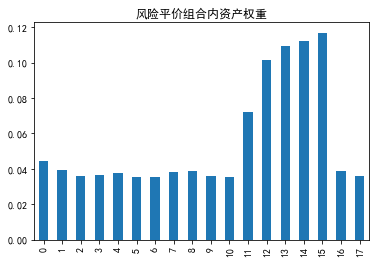

In [451]:
pd.Series(optim_w_rp).plot.bar(title='风险平价组合内资产权重')

<font color = 'red'>组合内资产的风险贡献：

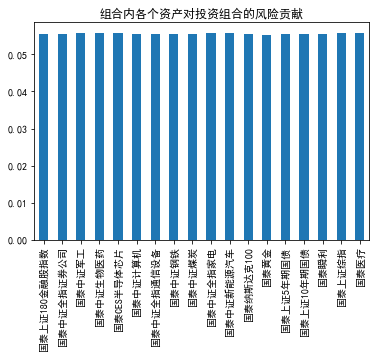

In [452]:
risk_contribution(optim_w_rp, corr_max).plot.bar(title="组合内各个资产对投资组合的风险贡献")

In [172]:
s1 = pd.Series([0.055487,0.055554,0.055603,0.055633,0.055734,0.055552,0.055579,0.055509, 0.055474,0.055624,0.055797,0.055447,0.055352,0.055408,0.055470,0.055472, 0.055622,0.055683],index = ['国泰上证180金融股指数','国泰中证全指证券公司','国泰中证军工','国泰中证生物医药','国泰CES半导体芯片','国泰中证计算机','国泰中证全指通信设备','国泰中证钢铁','国泰中证煤炭','国泰中证全指家电','国泰中证新能源汽车','国泰纳斯达克100','国泰黄金','国泰上证5年期国债','国泰上证10年期国债','国泰瞬利','国泰上证综指','国泰医疗'])

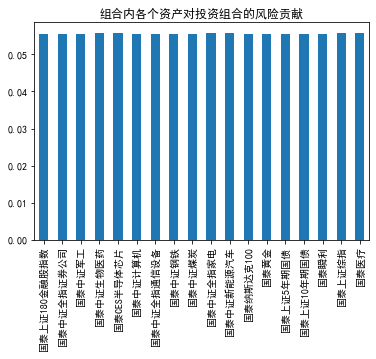

In [173]:
s1.plot.bar(title="组合内各个资产对投资组合的风险贡献")

<font color = 'red'> 组合的累计收益曲线：

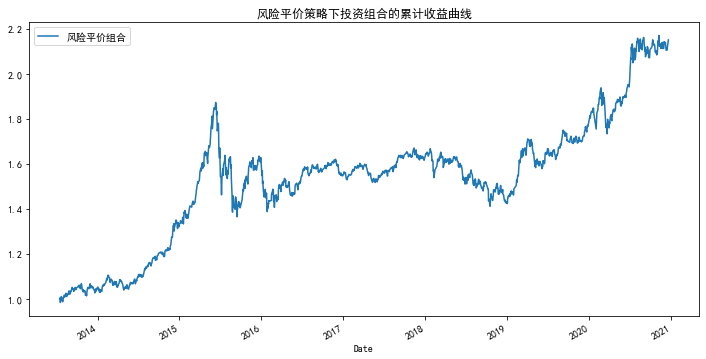

In [406]:
RP_port = np.sum(optim_w_rp * ETF_rets,axis = 1)
cumrets_RP = (1+RP_port).cumprod()
cumrets_RP.plot(figsize = (12,6),title = "风险平价策略下投资组合的累计收益曲线",label = '风险平价组合',legend=True)

In [407]:
RPcum1 = pd.DataFrame(cumrets_RP,columns=['RPCUM1'])
RPcum1.to_csv('风险平价1累计收益.csv')

In [411]:
#风险平价组合1 的相关统计数据
RP_p1 = pd.DataFrame(RP_port,columns=['RP'])
de.Summary_Stats(RP_p1)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Var(5%),CVaR(5%),Sharp Ratio,Max Drawdown
RP,0.111339,0.131812,-0.727798,6.958106,0.014227,0.021416,0.599175,-0.27097


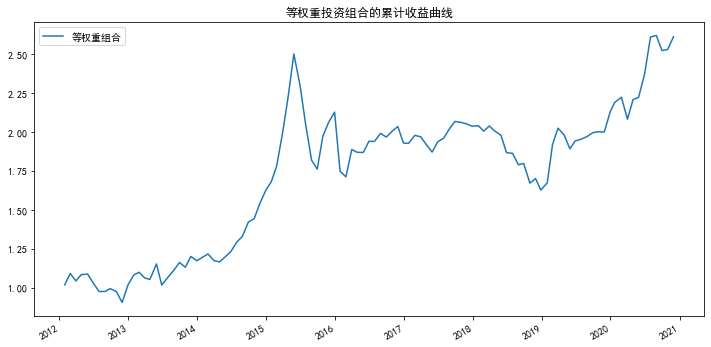

In [603]:
#等权重组合1
n = annu_cov.shape[0]
eq_w = (1/n,) * n 
port_rets = np.sum(eq_w * ETF_rets,axis = 1)
port_cumrets = (1+port_rets).cumprod()
port_cumrets.plot(figsize = (12,6), title = '等权重投资组合的累计收益曲线',label = '等权重组合',legend=True)

In [410]:
eq_p1 = pd.DataFrame(port_rets,columns=['EQ'])
de.Summary_Stats(eq_p1)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Var(5%),CVaR(5%),Sharp Ratio,Max Drawdown
EQ,0.138387,0.190786,-0.761979,7.111426,0.020731,0.03131,0.551618,-0.394764


In [604]:
port_rets.head()

2012-01-31    0.017443
2012-02-29    0.072308
2012-03-30   -0.044504
2012-04-27    0.038848
2012-05-31    0.003975
dtype: float64

In [597]:
eq_prets1 = pd.DataFrame(port_rets,columns=['EQ'])
eq_prets1.to_csv('EQ组合1月度收益数据.csv')

In [427]:
eq_cum1 = pd.DataFrame(port_cumrets,columns=['EQ'])
eq_cum1.to_csv('等权组合1收益.csv')

In [412]:
w_equal = np.repeat(1/n,n)
risk_contribution(w_equal, corr_max)

510230.OF    0.060546
512880.OF    0.069087
512660.OF    0.074795
512290.OF    0.073123
512760.OF    0.072531
512720.OF    0.077472
515880.OF    0.077909
515210.OF    0.071328
515220.OF    0.069981
159996.OF    0.075476
159806.OF    0.077475
513100.OF    0.033600
518800.OF    0.009214
511010.OF    0.003170
511260.OF    0.002742
511620.OF    0.007854
510760.OF    0.069865
159828.OF    0.073832
dtype: float64

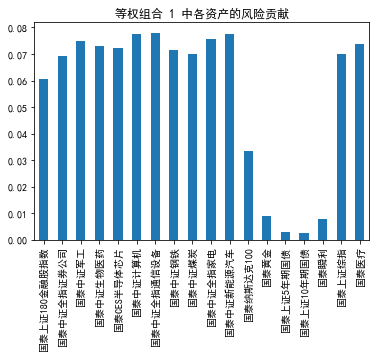

In [272]:
eq1 = pd.Series([0.060709,0.069117, 0.074843,0.073016,0.072279,0.077484, 0.077966,0.071563,0.070071,0.075705,0.077398,0.033522,0.009021,0.003102,0.002593,0.007904,0.070074,0.073633],index = ['国泰上证180金融股指数','国泰中证全指证券公司','国泰中证军工','国泰中证生物医药','国泰CES半导体芯片','国泰中证计算机','国泰中证全指通信设备','国泰中证钢铁','国泰中证煤炭','国泰中证全指家电','国泰中证新能源汽车','国泰纳斯达克100','国泰黄金','国泰上证5年期国债','国泰上证10年期国债','国泰瞬利','国泰上证综指','国泰医疗'])
eq1.plot.bar(title = '等权组合 1 中各资产的风险贡献')

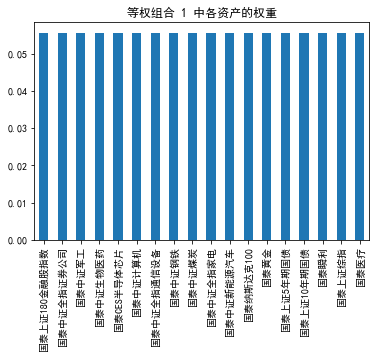

In [273]:
eq_qz = pd.Series([1/18,1/18,1/18,1/18,1/18,1/18,1/18,1/18,1/18,1/18,1/18,1/18,1/18,1/18,1/18,1/18,1/18,1/18],index = ['国泰上证180金融股指数','国泰中证全指证券公司','国泰中证军工','国泰中证生物医药','国泰CES半导体芯片','国泰中证计算机','国泰中证全指通信设备','国泰中证钢铁','国泰中证煤炭','国泰中证全指家电','国泰中证新能源汽车','国泰纳斯达克100','国泰黄金','国泰上证5年期国债','国泰上证10年期国债','国泰瞬利','国泰上证综指','国泰医疗'])
eq_qz.plot.bar(title = '等权组合 1 中各资产的权重')

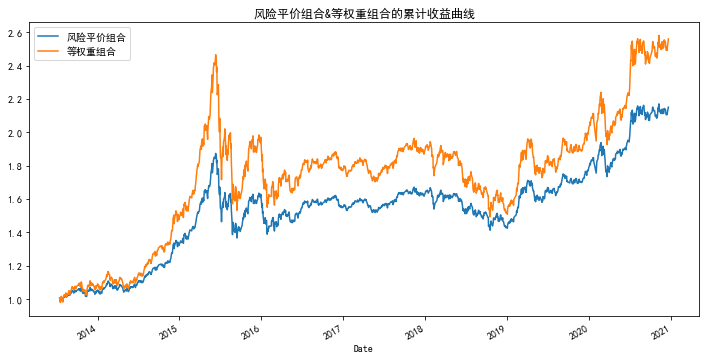

In [413]:
cumrets_RP.plot(figsize = (12,6),title = "风险平价组合&等权重组合的累计收益曲线",label = '风险平价组合',legend=True)
port_cumrets.plot(figsize = (12,6),label = '等权重组合',legend=True)

### 组合2

In [180]:
optim_w_rp2 = equal_risk_contributions(annu_cov2)
optim_w_rp2

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 6.769199728326245e-08
            Iterations: 7
            Function evaluations: 118
            Gradient evaluations: 7


array([0.08556071, 0.0538882 , 0.05655399, 0.06903701, 0.04954624,
       0.05136609, 0.0548279 , 0.06973737, 0.06293326, 0.06877407,
       0.05705994, 0.17052981, 0.08890964, 0.06127579])

In [185]:
risk_contribution(optim_w_rp2, annu_cov2)

510230.OF    0.071379
512880.OF    0.071447
512660.OF    0.071455
512290.OF    0.071414
512760.OF    0.071264
512720.OF    0.071446
515880.OF    0.071389
515210.OF    0.071424
515220.OF    0.071441
159996.OF    0.071404
159806.OF    0.071519
513100.OF    0.071577
510760.OF    0.071376
159828.OF    0.071465
dtype: float64

In [186]:
s1 = pd.Series([0.071379,0.071447,0.071455,0.071414,0.071264, 0.071446,0.071389,0.071424,0.071441,0.071404,0.071519,0.071577,0.071376,0.071465],
               index = ['国泰上证180金融股指数','国泰中证全指证券公司','国泰中证军工','国泰中证生物医药','国泰CES半导体芯片','国泰中证计算机','国泰中证全指通信设备','国泰中证钢铁','国泰中证煤炭','国泰中证全指家电','国泰中证新能源汽车','国泰纳斯达克100','国泰上证综指','国泰医疗'])

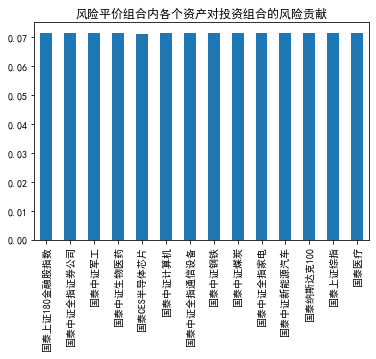

In [188]:
s1.plot.bar(title='风险平价组合内各个资产对投资组合的风险贡献')

In [183]:
p2 = pd.Series([0.08556071, 0.0538882 , 0.05655399, 0.06903701, 0.04954624,
       0.05136609, 0.0548279 , 0.06973737, 0.06293326, 0.06877407,
       0.05705994, 0.17052981, 0.08890964, 0.06127579],index = ['国泰上证180金融股指数','国泰中证全指证券公司','国泰中证军工','国泰中证生物医药','国泰CES半导体芯片','国泰中证计算机','国泰中证全指通信设备','国泰中证钢铁','国泰中证煤炭','国泰中证全指家电','国泰中证新能源汽车','国泰纳斯达克100','国泰上证综指','国泰医疗'])

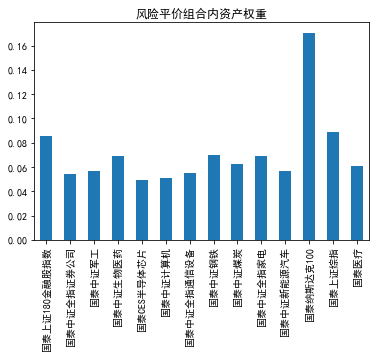

In [184]:
p2.plot.bar(title='风险平价组合内资产权重')

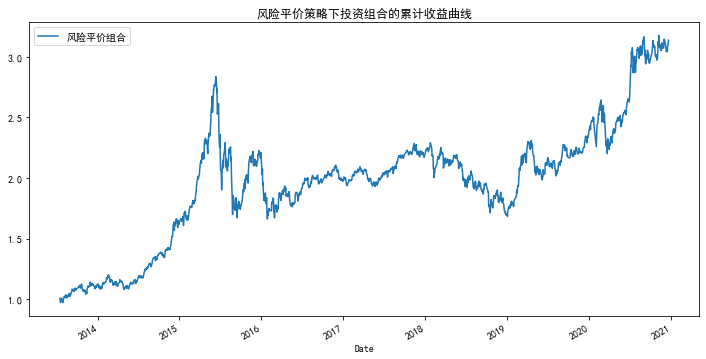

In [199]:
RP_port2 = np.sum(optim_w_rp2 * ETF_rets2,axis = 1)
cumrets_RP2 = (1+RP_port2).cumprod()
cumrets_RP2.plot(figsize = (12,6),title = "风险平价策略下投资组合的累计收益曲线",label = '风险平价组合',legend=True)

In [285]:
RP2 = pd.DataFrame(RP_port2,columns=['RP2'])
de.Summary_Stats(r=RP2)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Var(5%),CVaR(5%),Sharp Ratio,Max Drawdown
RP2,0.17077,0.221394,-0.829025,7.515287,0.024138,0.036423,0.617379,-0.414386


In [386]:
RPcum2 = pd.DataFrame(cumrets_RP2,columns=['RP2'])
RPcum2.to_csv('风险平价组合2累计收益.csv')

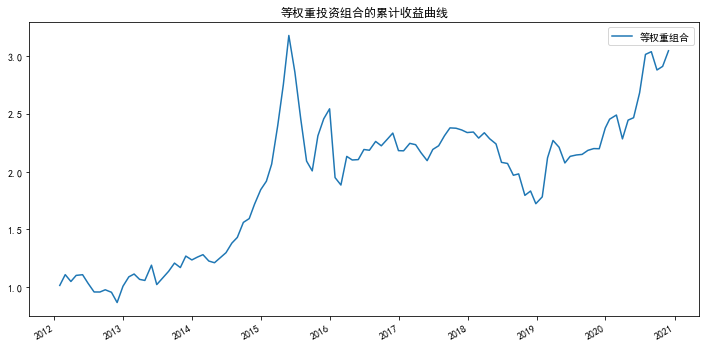

In [598]:
#等权重组合2
n2 = annu_cov2.shape[0]
eq_w2 = (1/n2,) * n2 
port_rets2 = np.sum(eq_w2 * ETF_rets2,axis = 1)
port_cumrets2 = (1+port_rets2).cumprod()
port_cumrets2.plot(figsize = (12,6), title = '等权重投资组合的累计收益曲线',label = '等权重组合',legend=True)

In [599]:
eq_prets2 = pd.DataFrame(port_rets2,columns=['EQ2'])
eq_prets2.to_csv('EQ组合2月度收益数据.csv')

In [279]:
w_equal2 = np.repeat(1/n2,n2)
risk_contribution(w_equal2, annu_cov2)

510230.OF    0.051420
512880.OF    0.084941
512660.OF    0.083875
512290.OF    0.067856
512760.OF    0.096422
512720.OF    0.092425
515880.OF    0.086471
515210.OF    0.065981
515220.OF    0.072720
159996.OF    0.066862
159806.OF    0.082194
513100.OF    0.021802
510760.OF    0.050139
159828.OF    0.076893
dtype: float64

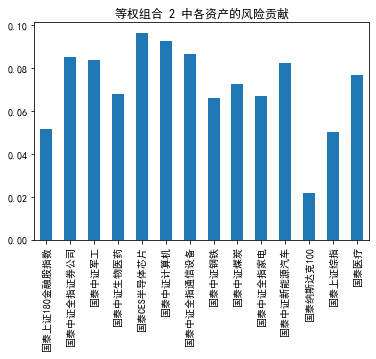

In [281]:
eq2 = pd.Series([0.051420,0.084941, 0.083875,0.067856, 0.096422, 0.092425, 0.086471,0.065981,0.072720, 0.066862,0.082194,0.021802, 0.050139,0.076893],index = ['国泰上证180金融股指数','国泰中证全指证券公司','国泰中证军工','国泰中证生物医药','国泰CES半导体芯片','国泰中证计算机','国泰中证全指通信设备','国泰中证钢铁','国泰中证煤炭','国泰中证全指家电','国泰中证新能源汽车','国泰纳斯达克100','国泰上证综指','国泰医疗'])
eq2.plot.bar(title = '等权组合 2 中各资产的风险贡献')

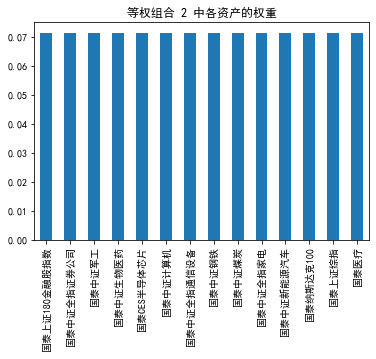

In [284]:
eq_qz = pd.Series([1/14,1/14,1/14,1/14,1/14,1/14,1/14,1/14,1/14,1/14,1/14,1/14,1/14,1/14],index = ['国泰上证180金融股指数','国泰中证全指证券公司','国泰中证军工','国泰中证生物医药','国泰CES半导体芯片','国泰中证计算机','国泰中证全指通信设备','国泰中证钢铁','国泰中证煤炭','国泰中证全指家电','国泰中证新能源汽车','国泰纳斯达克100','国泰上证综指','国泰医疗'])
eq_qz.plot.bar(title = '等权组合 2 中各资产的权重')

In [286]:
eq_p2 = pd.DataFrame(port_rets2,columns=['EQ'])
de.Summary_Stats(eq_p2)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Var(5%),CVaR(5%),Sharp Ratio,Max Drawdown
EQ,0.165048,0.245492,-0.784675,7.230662,0.026756,0.040457,0.534142,-0.498361


In [387]:
eq_rets2 = pd.DataFrame(port_rets2,columns=['EQ'])
eq_rets2.to_csv('等权组合2收益.csv')

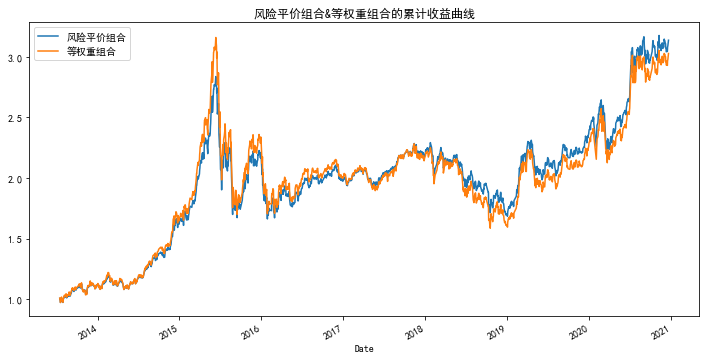

In [201]:
cumrets_RP2.plot(figsize = (12,6),title = "风险平价组合&等权重组合的累计收益曲线",label = '风险平价组合',legend=True)
port_cumrets2.plot(figsize = (12,6),label = '等权重组合',legend=True)

### **滚动计算-窗口期选择为250个交易日**

In [605]:
def backtest_rolling(rets, obj_fun, estimation_window=12):
    """
    Backtests a given optimization scheme, given some parameters:
    r : asset returns to use to build the portfolio
    estimation_window: the window to use to estimate parameters
    obj_fun: objective function given above: MaxSR,MinMaxDD,MinCVaR,RiskParity,CVaR_Budgeting,EQ
    """
    n_periods = rets.shape[0]
    windows = [(start, start+estimation_window) for start in range(n_periods-estimation_window+1)]
    # windows is a list of tuples which gives us the (integer) location of the start and stop (non inclusive)
    # for each estimation window
    weights = [obj_fun(rets.iloc[win[0]:win[1]]) for win in windows]
    # List -> DataFrame
    weights = pd.DataFrame(weights, index=rets.iloc[estimation_window-1:].index, columns=rets.columns)
    # return weights
    returns = (weights * rets).sum(axis="columns",  min_count=1) #mincount is to generate NAs if all inputs are NAs
    return returns.dropna()

def weight_ew(rets):
    """
    return the weights of the EQ portfolio
    """
    n = len(rets.columns)
    return pd.Series(1/n, index = rets.columns)

def erc(rets):
    """
    Returns the weights of the portfolio that gives you the weights such
    that the contributions to portfolio risk are as close as possible to
    the target_risk, given the covariance matrix
    """
    covmatrix = rets.cov()
    n = covmatrix.shape[0]
    init_guess = np.repeat(1/n, n)
    bounds = ((0.0, 1.0),) * n
    target_risk=np.repeat(1/n,n)
    # construct the constraints
    weights_sum_to_1 = {'type': 'eq',
                        'fun': lambda weights: np.sum(weights) - 1
    }
    
    def erc_risk(weights,cov,target_risk):
        """
        Returns the Mean Squared Difference in risk contributions
        between weights and target_risk
        """
        cov = covmatrix
        total_portfolio_var = np.sqrt(weights.T @ cov @ weights)
        # Marginal contribution of each constituent
        marginal_contrib = cov @ weights
        risk_contrib = np.multiply(marginal_contrib,weights.T)/total_portfolio_var
        
        return ((risk_contrib-target_risk)**2).sum()
    
    weights = minimize(erc_risk, init_guess,
                       args = (covmatrix, target_risk), method='SLSQP',
                       options={'disp': False},
                       constraints=(weights_sum_to_1,),
                       bounds=bounds)
    return weights.x

<font color = 'red'> 回测后得到的累计收益曲线

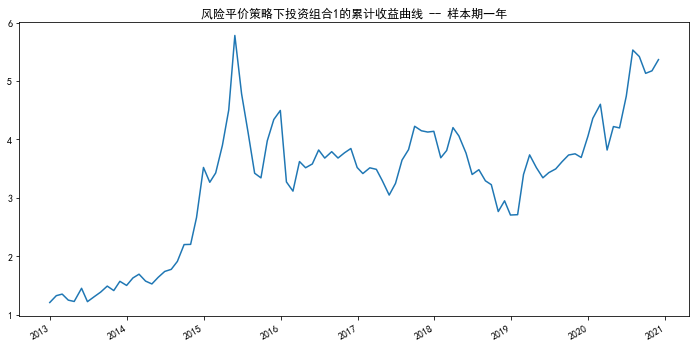

In [606]:
RP_r = backtest_rolling(rets = ETF_rets,obj_fun =erc)
RPcumr_bt = (1+RP_r).cumprod()
RPcumr_bt.plot(figsize=(12,6), title="风险平价策略下投资组合1的累计收益曲线 -- 样本期一年")

In [607]:
RP_r

2012-12-31    0.210563
2013-01-31    0.096698
2013-02-28    0.020296
2013-03-29   -0.076218
2013-04-26   -0.018237
                ...   
2020-07-31    0.166681
2020-08-31   -0.020259
2020-09-30   -0.052956
2020-10-30    0.008405
2020-11-30    0.037084
Length: 96, dtype: float64

In [608]:
RP_r = pd.DataFrame(RP_r,columns=['RP m'])
RP_r.to_csv('RP资产组合1月度收益率.csv')

In [539]:
RP_r_m = backtest_rolling(rets = ETF_rets_m,obj_fun =erc)
RP_r_m

2014-06    0.030358
2014-07    0.051114
2014-08    0.024276
2014-09    0.068011
2014-10    0.015959
             ...   
2020-08    0.027538
2020-09   -0.043180
2020-10    0.005054
2020-11    0.025868
2020-12    0.029372
Freq: M, Length: 79, dtype: float64

In [540]:
RP_r_m = pd.DataFrame(RP_r_m,columns=['RP bt13'])
RP_r_m.to_csv('资产组合1月度收益率.csv')

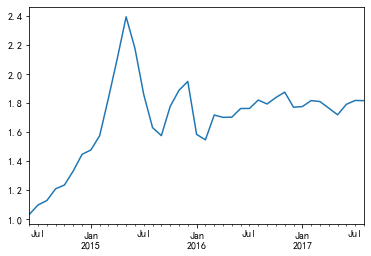

In [530]:
RPcumr_bt_m = (1+RP_r_m).cumprod()
RPcumr_bt_m.plot()

In [582]:
estimation_window = 12
n_periods = ETF_rets.shape[0]
windows = [(start, start+estimation_window) for start in range(n_periods-estimation_window+1)]
weights_m = [erc(ETF_rets.iloc[win[0]:win[1]]) for win in windows]
weights_m = pd.DataFrame(weights_m, index=ETF_rets.iloc[estimation_window-1:].index, columns=ETF_rets.columns) 

In [583]:
weights_m

,国泰上证180金融股指数,国泰中证全指证券公司,国泰中证军工,国泰中证生物医药,国泰CES半导体芯片,国泰中证计算机,国泰中证全指通信设备,国泰中证钢铁,国泰中证煤炭,国泰中证全指家电,国泰中证新能源汽车,国泰纳斯达克100,国泰黄金,国泰上证5年期国债,国泰上证10年期国债,国泰上证综指,国泰医疗
2012-12-31,0.057048,0.057683,0.051274,0.063736,0.056080,0.053738,0.052821,0.054235,0.055099,0.054225,0.051854,1.413145e-01,1.313249e-01,3.115346e-14,8.242612e-15,0.051984,0.067585
2013-01-31,0.057128,0.058550,0.050814,0.063918,0.053526,0.051879,0.050808,0.056097,0.055861,0.055038,0.052807,1.436015e-01,1.394754e-01,0.000000e+00,0.000000e+00,0.052885,0.057612
2013-02-28,0.057296,0.055057,0.054272,0.062501,0.056354,0.055065,0.052707,0.056834,0.057168,0.052681,0.050873,7.284483e-18,0.000000e+00,1.214066e-01,1.522878e-01,0.054419,0.061079
2013-03-29,0.058316,0.055335,0.054559,0.064015,0.056556,0.056361,0.054446,0.056951,0.057722,0.053226,0.050809,0.000000e+00,0.000000e+00,1.137242e-01,1.517120e-01,0.054754,0.061514
2013-04-26,0.058565,0.055585,0.055518,0.062559,0.057028,0.056789,0.054498,0.057432,0.058207,0.054798,0.051154,9.931766e-16,1.161919e-15,1.159402e-01,1.456634e-01,0.054834,0.061431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-31,0.060019,0.057806,0.059876,0.063612,0.067164,0.062564,0.067343,0.075891,0.066542,0.060400,0.062886,6.910204e-02,9.631891e-02,3.824004e-14,9.127138e-15,0.054954,0.075521
2020-08-31,0.061191,0.057685,0.060974,0.068960,0.068946,0.063254,0.068579,0.075798,0.067344,0.062065,0.063850,7.658992e-02,7.412458e-02,0.000000e+00,0.000000e+00,0.055581,0.075059
2020-09-30,0.062625,0.059817,0.061753,0.068231,0.069579,0.062844,0.063205,0.073738,0.071244,0.062779,0.069807,7.427339e-02,7.057507e-02,0.000000e+00,0.000000e+00,0.056626,0.072903
2020-10-30,0.061236,0.060314,0.062162,0.067496,0.069059,0.062861,0.063394,0.073861,0.071058,0.064047,0.072091,7.336757e-02,7.033592e-02,0.000000e+00,0.000000e+00,0.056139,0.072579


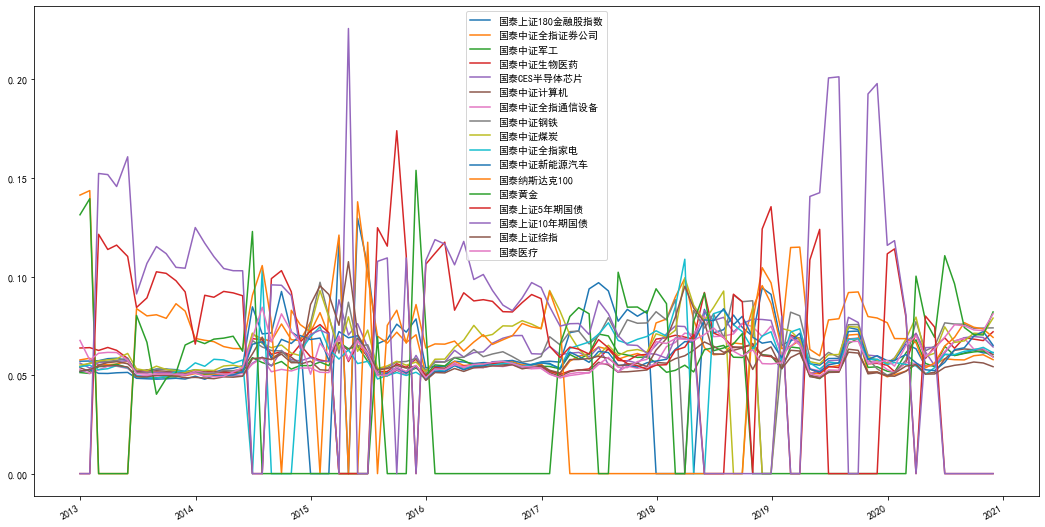

In [584]:
weights_m.plot(figsize=(18,10))

In [585]:
weights_m.to_csv('RP资产组合1月度权重13.csv')

In [429]:
RP_r = pd.DataFrame(RP_r,columns=['RP bt1'])
de.Summary_Stats(r=RP_r)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Var(5%),CVaR(5%),Sharp Ratio,Max Drawdown
RP bt1,0.138659,0.201683,-0.733892,6.7204,0.021947,0.033215,0.523119,-0.40782


In [430]:
RP_btr1 = pd.DataFrame(RPcumr_bt,columns=['RP bt1'])
RP_btr1.to_csv('风险平价滚动计算1.csv')

In [431]:
estimation_window = 250
n_periods = ETF_rets.shape[0]
windows = [(start, start+estimation_window) for start in range(n_periods-estimation_window+1)]
weights = [erc(ETF_rets.iloc[win[0]:win[1]]) for win in windows]
weights = pd.DataFrame(weights, index=ETF_rets.iloc[estimation_window-1:].index, columns=ETF_rets.columns) 

<font color = 'red'>各时点风险平价组合中资产的权重

In [432]:
weights.head()

,510230.OF,512880.OF,512660.OF,512290.OF,512760.OF,512720.OF,515880.OF,515210.OF,515220.OF,159996.OF,159806.OF,513100.OF,518800.OF,511010.OF,511260.OF,511620.OF,510760.OF,159828.OF
Date,,,,,,,,,,,,,,,,,,
2014-07-23,0.062662,0.059031,0.052353,0.055378,0.053032,0.054497,0.051622,0.054528,0.057478,0.053935,0.050219,0.089613,0.094807,0.094810,1.601289e-14,6.203961e-14,0.057818,0.058216
2014-07-24,0.062773,0.059194,0.052458,0.055471,0.053028,0.054516,0.051728,0.054532,0.057574,0.053881,0.050190,0.089220,0.095387,0.093866,4.488258e-16,5.671265e-15,0.057967,0.058214
2014-07-25,0.062811,0.059313,0.052551,0.055624,0.053097,0.054508,0.051669,0.054611,0.057465,0.053849,0.050056,0.089236,0.095953,0.092771,1.890035e-16,4.560696e-15,0.057996,0.058491
2014-07-28,0.062440,0.059133,0.052217,0.055505,0.052942,0.054069,0.051303,0.054445,0.057189,0.053774,0.050307,0.089491,0.094783,0.096414,1.352678e-16,0.000000e+00,0.057872,0.058117
2014-07-29,0.062590,0.059574,0.052219,0.055544,0.052929,0.053916,0.051181,0.054788,0.057605,0.053927,0.050254,0.090231,0.094152,0.094662,0.000000e+00,2.435538e-15,0.058238,0.058192


In [151]:
def mean_weights(weights):
    n = weights.shape[0]
    return (np.sum(weights)) / n

In [156]:
weights_m = weights.resample('M').apply(mean_weights).to_period('M')
weights_m

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


,510230.OF,512880.OF,512660.OF,512290.OF,512760.OF,512720.OF,515880.OF,515210.OF,515220.OF,159996.OF,159806.OF,513100.OF,518800.OF,511010.OF,511260.OF,511620.OF,510760.OF,159828.OF
Date,,,,,,,,,,,,,,,,,,
2014-07,0.062893,0.059298,0.052364,0.055545,0.053071,0.054243,0.051597,0.054485,0.057360,0.053808,0.050370,0.089247,0.093615,9.586217e-02,1.717678e-15,3.143683e-16,0.057842,0.058399
2014-08,0.062950,0.059405,0.052433,0.055969,0.052899,0.053812,0.051367,0.055181,0.057010,0.053989,0.050643,0.088439,0.093754,9.563361e-02,4.024692e-15,9.421069e-16,0.057820,0.058694
2014-09,0.062962,0.058955,0.052097,0.055638,0.052653,0.053055,0.050469,0.055258,0.056702,0.053953,0.050614,0.090510,0.096480,9.447880e-02,1.457975e-16,1.057174e-16,0.057614,0.058561
2014-10,0.062686,0.058427,0.052188,0.055277,0.052382,0.052612,0.050143,0.054628,0.056474,0.053307,0.050558,0.094139,0.098602,9.414463e-02,1.975711e-16,2.324637e-16,0.056729,0.057704
2014-11,0.063547,0.059309,0.052644,0.056187,0.052522,0.052489,0.050320,0.055670,0.056077,0.052641,0.050631,0.093544,0.094407,9.346451e-02,3.197486e-16,2.706044e-16,0.058151,0.058396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08,0.055904,0.054356,0.057548,0.065936,0.058592,0.052882,0.055155,0.056593,0.057840,0.054117,0.057165,0.072592,0.132211,8.042287e-16,8.459054e-16,5.284296e-02,0.053108,0.063157
2020-09,0.057027,0.055131,0.058389,0.066557,0.060080,0.053739,0.056057,0.058635,0.059499,0.054855,0.058291,0.077865,0.126076,4.341666e-16,4.479656e-16,4.006689e-02,0.053894,0.063839
2020-10,0.059175,0.057244,0.060419,0.069205,0.062388,0.055289,0.057631,0.061444,0.062474,0.056773,0.060586,0.081638,0.134319,4.259804e-16,4.158039e-16,7.031882e-17,0.055256,0.066159


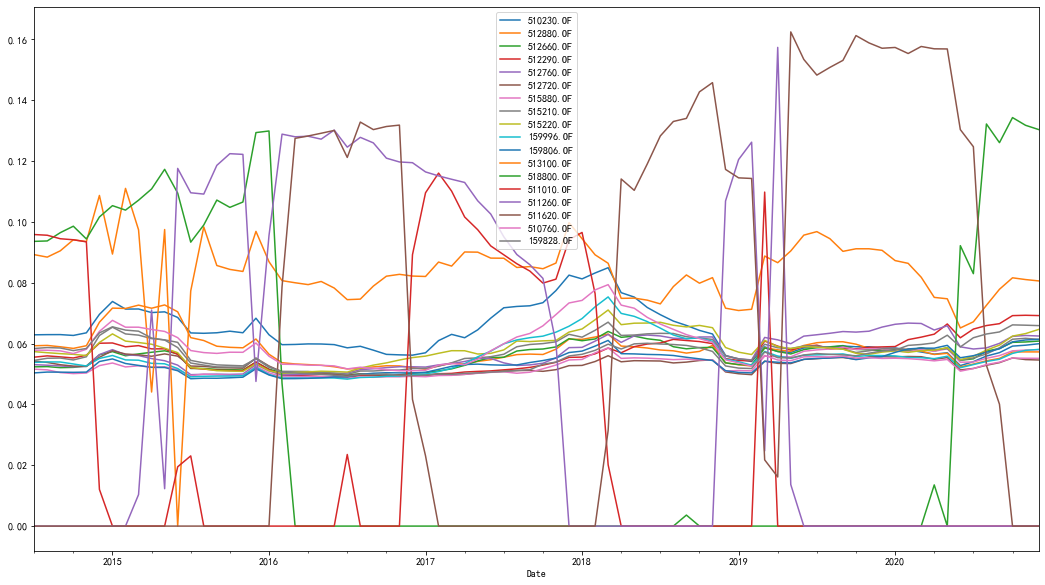

In [354]:
weights_m.plot(figsize=(18,10))

In [433]:
weights_m.to_csv('风险平价滚动1持仓权重.csv')

### 组合2回测滚动测试

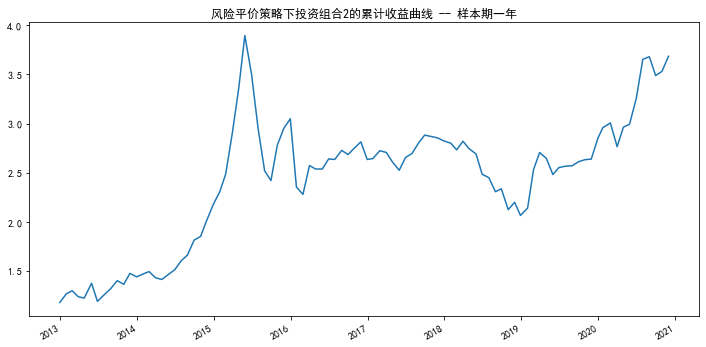

In [562]:
RP_r2 = backtest_rolling(rets = ETF_rets2,obj_fun =erc)
RPcumr_bt2 = (1+RP_r2).cumprod()
RPcumr_bt2.plot(figsize=(12,6), title="风险平价策略下投资组合2的累计收益曲线 -- 样本期一年")

In [564]:
RP_r2.head()

2012-12-31    0.175727
2013-01-31    0.074973
2013-02-28    0.024833
2013-03-29   -0.046941
2013-04-26   -0.010925
dtype: float64

In [563]:
RP_r_m2 = backtest_rolling(rets = ETF_rets2,obj_fun =erc)
RP_r_m2

2012-12-31    0.175727
2013-01-31    0.074973
2013-02-28    0.024833
2013-03-29   -0.046941
2013-04-26   -0.010925
                ...   
2020-07-31    0.122346
2020-08-31    0.007352
2020-09-30   -0.052084
2020-10-30    0.012052
2020-11-30    0.043554
Length: 96, dtype: float64

In [565]:
RP_r_m2 = pd.DataFrame(RP_r_m2,columns=['RP bt2'])
RP_r_m2.to_csv('RP资产组合2月度收益.csv')

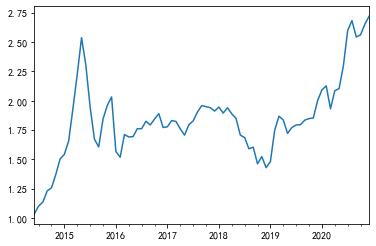

In [475]:
RPcumr_bt_m2 = (1+RP_r_m2).cumprod()
RPcumr_bt_m2.plot()

In [566]:
estimation_window = 12
n_periods_m2 = ETF_rets2.shape[0]
windows_m2 = [(start, start+estimation_window) for start in range(n_periods_m2-estimation_window+1)]
weights_m2 = [erc(ETF_rets2.iloc[win[0]:win[1]]) for win in windows_m2]
weights_m2 = pd.DataFrame(weights_m2, index=ETF_rets2.iloc[estimation_window-1:].index, columns=ETF_rets2.columns) 

In [568]:
weights_m2.to_csv('RP资产组合2月度权重.csv')

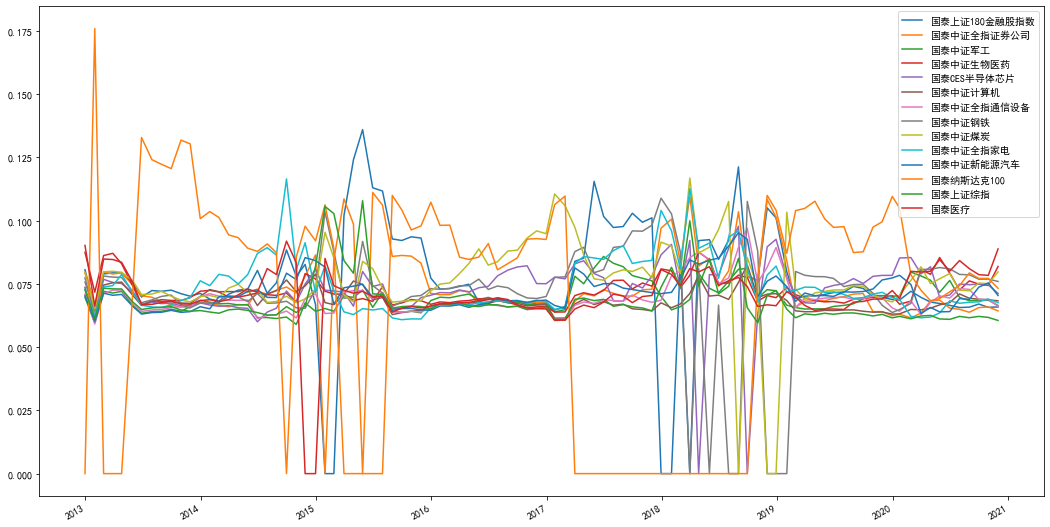

In [567]:
weights_m2.plot(figsize=(18,10))

In [340]:
RP_r2 = pd.DataFrame(RP_r2,columns=['RP bt2'])
de.Summary_Stats(r=RP_r2)

,Annualized Return,Annualized Vol,Skewness,Kurtosis,Var(5%),CVaR(5%),Sharp Ratio,Max Drawdown
RP bt2,0.166201,0.247162,-0.804111,7.154134,0.027038,0.041344,0.53506,-0.478024


In [392]:
RP_btr2 = pd.DataFrame(RPcumr_bt2,columns=['RP bt1'])
RP_btr2.to_csv('风险平价滚动计算2收益.csv')

In [341]:
estimation_window = 250
n_periods2 = ETF_rets2.shape[0]
windows = [(start, start+estimation_window) for start in range(n_periods2-estimation_window+1)]
weights2 = [erc(ETF_rets2.iloc[win[0]:win[1]]) for win in windows]
weights2 = pd.DataFrame(weights2, index=ETF_rets2.iloc[estimation_window-1:].index, columns=ETF_rets2.columns)

In [345]:
weights2

,510230.OF,512880.OF,512660.OF,512290.OF,512760.OF,512720.OF,515880.OF,515210.OF,515220.OF,159996.OF,159806.OF,513100.OF,510760.OF,159828.OF
Date,,,,,,,,,,,,,,
2014-07-23,0.077194,0.072736,0.065227,0.068658,0.065999,0.067394,0.064138,0.067691,0.071121,0.066634,0.062866,0.106943,0.071379,0.072021
2014-07-24,0.077245,0.072858,0.065346,0.068792,0.065971,0.067412,0.064213,0.067657,0.071161,0.066534,0.062905,0.106399,0.071492,0.072015
2014-07-25,0.077291,0.072933,0.065392,0.068854,0.065980,0.067310,0.064074,0.067674,0.070935,0.066538,0.062862,0.106573,0.071486,0.072100
2014-07-28,0.076949,0.072758,0.065288,0.068884,0.066020,0.067040,0.063983,0.067637,0.070760,0.066572,0.063028,0.107709,0.071356,0.072017
2014-07-29,0.077097,0.072908,0.065351,0.068788,0.066047,0.066803,0.064024,0.067792,0.070877,0.066595,0.063107,0.107274,0.071348,0.071990
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-15,0.068651,0.066472,0.071308,0.079522,0.071152,0.063766,0.066959,0.070254,0.074379,0.068293,0.071193,0.087624,0.063972,0.076456
2020-12-16,0.068655,0.066464,0.071295,0.079517,0.071144,0.063761,0.066991,0.070220,0.074325,0.068265,0.071193,0.087704,0.063988,0.076480
2020-12-17,0.068625,0.066438,0.071469,0.079428,0.071155,0.063828,0.067013,0.070212,0.074292,0.068235,0.071159,0.087762,0.063967,0.076417


In [346]:
weights_m2 = weights2.resample('M').apply(mean_weights).to_period('M')
weights_m2

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


,510230.OF,512880.OF,512660.OF,512290.OF,512760.OF,512720.OF,515880.OF,515210.OF,515220.OF,159996.OF,159806.OF,513100.OF,510760.OF,159828.OF
Date,,,,,,,,,,,,,,
2014-07,0.077174,0.072934,0.065326,0.068824,0.066034,0.067088,0.064081,0.067729,0.070950,0.066592,0.062992,0.106864,0.071382,0.072030
2014-08,0.077399,0.073097,0.065357,0.069315,0.065770,0.066537,0.063831,0.068443,0.070646,0.066676,0.063236,0.105860,0.071409,0.072424
2014-09,0.077567,0.072202,0.065130,0.069321,0.065717,0.066027,0.063282,0.068272,0.070061,0.066686,0.063484,0.108806,0.070760,0.072686
2014-10,0.077303,0.072005,0.065330,0.068941,0.065486,0.065628,0.062766,0.067879,0.070150,0.066238,0.063492,0.113004,0.070124,0.071654
2014-11,0.077892,0.072878,0.065604,0.069678,0.065331,0.065206,0.062684,0.068823,0.069392,0.065168,0.063353,0.110162,0.071514,0.072316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08,0.068099,0.066793,0.071518,0.081244,0.071930,0.065648,0.067899,0.069292,0.070763,0.067056,0.070332,0.086616,0.064983,0.077826
2020-09,0.067965,0.066389,0.071243,0.080171,0.071953,0.065406,0.067514,0.070022,0.071090,0.066920,0.070279,0.089346,0.064638,0.077066
2020-10,0.068051,0.066619,0.071291,0.080042,0.071693,0.065200,0.067089,0.070455,0.071711,0.067107,0.070437,0.089148,0.064232,0.076926


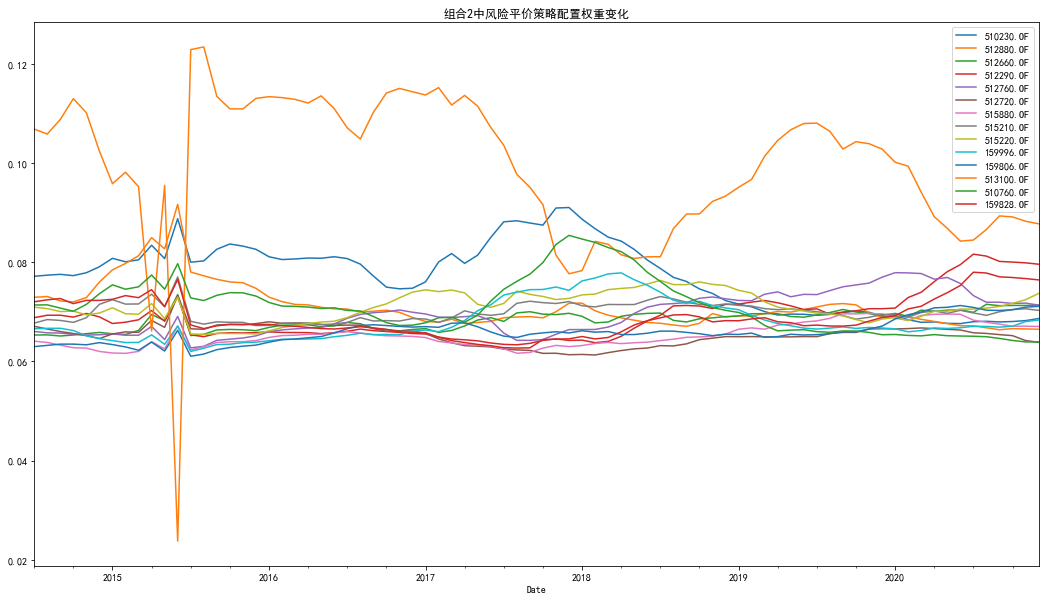

In [353]:
weights_m2.plot(legend = True, figsize = (18,10),title = "组合2中风险平价策略配置权重变化")

In [393]:
weights_m2.to_csv('风险平价滚动持仓权重2.csv')